## Data Science Capston - Healthcare Insurance Analysis

### Data science

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows' , None)
import warnings
warnings.filterwarnings("ignore")

### Problem -1
Collating all the data for easier anlysis

In [107]:
Hospital = pd.read_csv("Hospitalisation details.csv")
Medical = pd.read_csv("Medical Examinations.csv")
Names = pd.read_excel('Names.xlsx')


In [108]:
Hospital.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [109]:
Medical.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [110]:
Names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


### Problem -2
checking for missing values in the Dataset

In [111]:
Hospital.isnull().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [112]:
Medical.isnull().sum()

Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [113]:
Names.isnull().sum()

Customer ID    0
name           0
dtype: int64

In [114]:
Hospital.shape

(2343, 9)

In [115]:
Medical.shape

(2335, 8)

In [116]:
Names.shape

(2335, 2)

#### Conclusion: There is no null and missing value in the dataset

In [117]:
merge_data = pd.merge(Hospital,Medical, on = 'Customer ID')

In [118]:
merge_data.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No


In [119]:
whole_data = pd.merge(merge_data,Names , on= 'Customer ID')

In [211]:
whole_data.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [121]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [122]:
whole_data['City tier'].head()

0    tier - 3
1    tier - 1
2    tier - 1
3    tier - 3
4    tier - 3
Name: City tier, dtype: object

In [123]:
whole_data.columns = whole_data.columns.str.lower()
whole_data.columns = whole_data.columns.str.replace(' ','_')
whole_data.columns


Index(['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hba1c',
       'heart_issues', 'any_transplants', 'cancer_history',
       'numberofmajorsurgeries', 'smoker', 'name'],
      dtype='object')

In [124]:
whole_data.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [125]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   hospital_tier           2335 non-null   object 
 7   city_tier               2335 non-null   object 
 8   state_id                2335 non-null   object 
 9   bmi                     2335 non-null   float64
 10  hba1c                   2335 non-null   float64
 11  heart_issues            2335 non-null   object 
 12  any_transplants         2335 non-null   object 
 13  cancer_history          2335 non-null   object 
 14  numberofmajorsurgeries  2335 non-null   

In [126]:
whole_data.describe()

,date,children,charges,bmi,hba1c
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


#### Problem -3
Find the percentage of rows that have trivial value (for example, ?),and delete such rows if they do not contain significant information

In [127]:
(whole_data == '?').sum()

customer_id               0
year                      2
month                     3
date                      0
children                  0
charges                   0
hospital_tier             1
city_tier                 1
state_id                  2
bmi                       0
hba1c                     0
heart_issues              0
any_transplants           0
cancer_history            0
numberofmajorsurgeries    0
smoker                    2
name                      0
dtype: int64

In [212]:
# Identify rows containing trivial values
rows_with_trivial = whole_data.eq('?').any(axis=1)
rows_with_trivial.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [129]:
(whole_data == '?').sum()
pc_data_col = ((whole_data=='?').sum(axis=1)/(whole_data.shape[1]))*100
pc_data_col[pc_data_col>0]
pc_data_row = (((whole_data=='?').sum())/whole_data.shape[0])*100
pc_data_row.sort_values(ascending=False)



month                     0.128480
state_id                  0.085653
smoker                    0.085653
year                      0.085653
hospital_tier             0.042827
city_tier                 0.042827
heart_issues              0.000000
numberofmajorsurgeries    0.000000
cancer_history            0.000000
any_transplants           0.000000
customer_id               0.000000
hba1c                     0.000000
bmi                       0.000000
charges                   0.000000
children                  0.000000
date                      0.000000
name                      0.000000
dtype: float64

#### Drop all the "?" from the data

In [213]:
whole_data_cleaned = whole_data.drop(index = pc_data_col[pc_data_col>0].index)
whole_data_cleaned.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [131]:
(whole_data_cleaned =="?").sum()

customer_id               0
year                      0
month                     0
date                      0
children                  0
charges                   0
hospital_tier             0
city_tier                 0
state_id                  0
bmi                       0
hba1c                     0
heart_issues              0
any_transplants           0
cancer_history            0
numberofmajorsurgeries    0
smoker                    0
name                      0
dtype: int64

#### Problem - 4
Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset


In [214]:
whole_data_cleaned[['hospital_tier', 'city_tier']].head()

,hospital_tier,city_tier
0,tier - 2,tier - 3
1,tier - 2,tier - 1
2,tier - 2,tier - 1
3,tier - 3,tier - 3
4,tier - 3,tier - 3


In [133]:
whole_data.state_id.value_counts()[:3]


R1013    612
R1012    575
R1011    574
Name: state_id, dtype: int64

In [134]:
# import ordinalEncoder to deal with ordinal categorical variables - city tier and hospital tier
from sklearn.preprocessing import OrdinalEncoder

In [135]:
ordinal = OrdinalEncoder(categories= [['tier - 3', 'tier - 2', 'tier - 1'],['tier - 3', 'tier - 2', 'tier - 1']])
whole_data_cleaned[['city_tier_ord', 'hospital_tier_ord']] = ordinal.fit_transform(whole_data_cleaned[['city_tier', 'hospital_tier']])

In [136]:
pd.crosstab(whole_data_cleaned['city_tier_ord'],whole_data_cleaned['city_tier'])


city_tier,tier - 1,tier - 2,tier - 3
city_tier_ord,,,
0.0,0,0,789
1.0,0,807,0
2.0,729,0,0


In [137]:
pd.crosstab(whole_data_cleaned['hospital_tier_ord'],[whole_data_cleaned['hospital_tier']])


hospital_tier,tier - 1,tier - 2,tier - 3
hospital_tier_ord,,,
0.0,0,0,691
1.0,0,1334,0
2.0,300,0,0


In [138]:
# Create dummies

whole_data_cleaned.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name,city_tier_ord,hospital_tier_ord
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",0.0,1.0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",2.0,1.0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",2.0,1.0
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",0.0,0.0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",0.0,0.0


In [139]:
vc = whole_data_cleaned.state_id.value_counts() # frequency of each category
vc[:3].index # top 3 frequent categories


Index(['R1013', 'R1011', 'R1012'], dtype='object')

In [140]:
for i in vc[:3].index:
 var_name = 'state_id_' + i
 print(var_name)
 whole_data_cleaned[var_name] = 0
 whole_data_cleaned.loc[whole_data_cleaned.state_id == i,var_name]= 1

state_id_R1013
state_id_R1011
state_id_R1012


#### Problem - 5
The dataset has State ID,which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating 
further. Design a suitable strategy to create dummy variables with these restraint.s

In [141]:
whole_data_cleaned.state_id.value_counts()


R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: state_id, dtype: int64

In [142]:
whole_data_cleaned['state_id'].value_counts()


R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: state_id, dtype: int64

In [143]:
# Counting the number of records associated with R1013
whole_data_cleaned['state_id_R1013'].value_counts()

0    1716
1     609
Name: state_id_R1013, dtype: int64

In [144]:
whole_data_cleaned['state_id_R1012'].value_counts()

0    1753
1     572
Name: state_id_R1012, dtype: int64

#### Problem -6
The variable NumberOfMajorSurgeriesalso appears to have string values. Apply a suitable method to clean up this variable

In [215]:
whole_data_cleaned.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [146]:
whole_data_cleaned.numberofmajorsurgeries.unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [147]:
whole_data_cleaned.loc[whole_data_cleaned.numberofmajorsurgeries == 'No major surgery', 'numberofmajorsurgeries'] = 0

In [148]:
whole_data_cleaned.numberofmajorsurgeries = whole_data_cleaned.numberofmajorsurgeries.astype (int)


#### Problem -7
Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their 
dates of birth

In [149]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   hospital_tier           2335 non-null   object 
 7   city_tier               2335 non-null   object 
 8   state_id                2335 non-null   object 
 9   bmi                     2335 non-null   float64
 10  hba1c                   2335 non-null   float64
 11  heart_issues            2335 non-null   object 
 12  any_transplants         2335 non-null   object 
 13  cancer_history          2335 non-null   object 
 14  numberofmajorsurgeries  2335 non-null   

In [150]:
whole_data_cleaned.year = whole_data_cleaned.year.astype(int)

#### Problem - 8
The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [151]:
whole_data_cleaned['title']= whole_data_cleaned.name.str.split('[,.]').str[1].str.strip()

In [152]:
whole_data_cleaned.shape

(2325, 23)

In [153]:
def get_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Mrs.' in name or 'Ms.' in name:
        return 'Female'
    else:
        return 'Unknown'

# Apply the function to create a new gender column
whole_data_cleaned['gender'] = whole_data_cleaned['name'].apply(get_gender)

In [216]:
whole_data_cleaned.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [155]:
whole_data_cleaned.gender.value_counts()

Female    1165
Male      1160
Name: gender, dtype: int64

#### Problem -9
You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

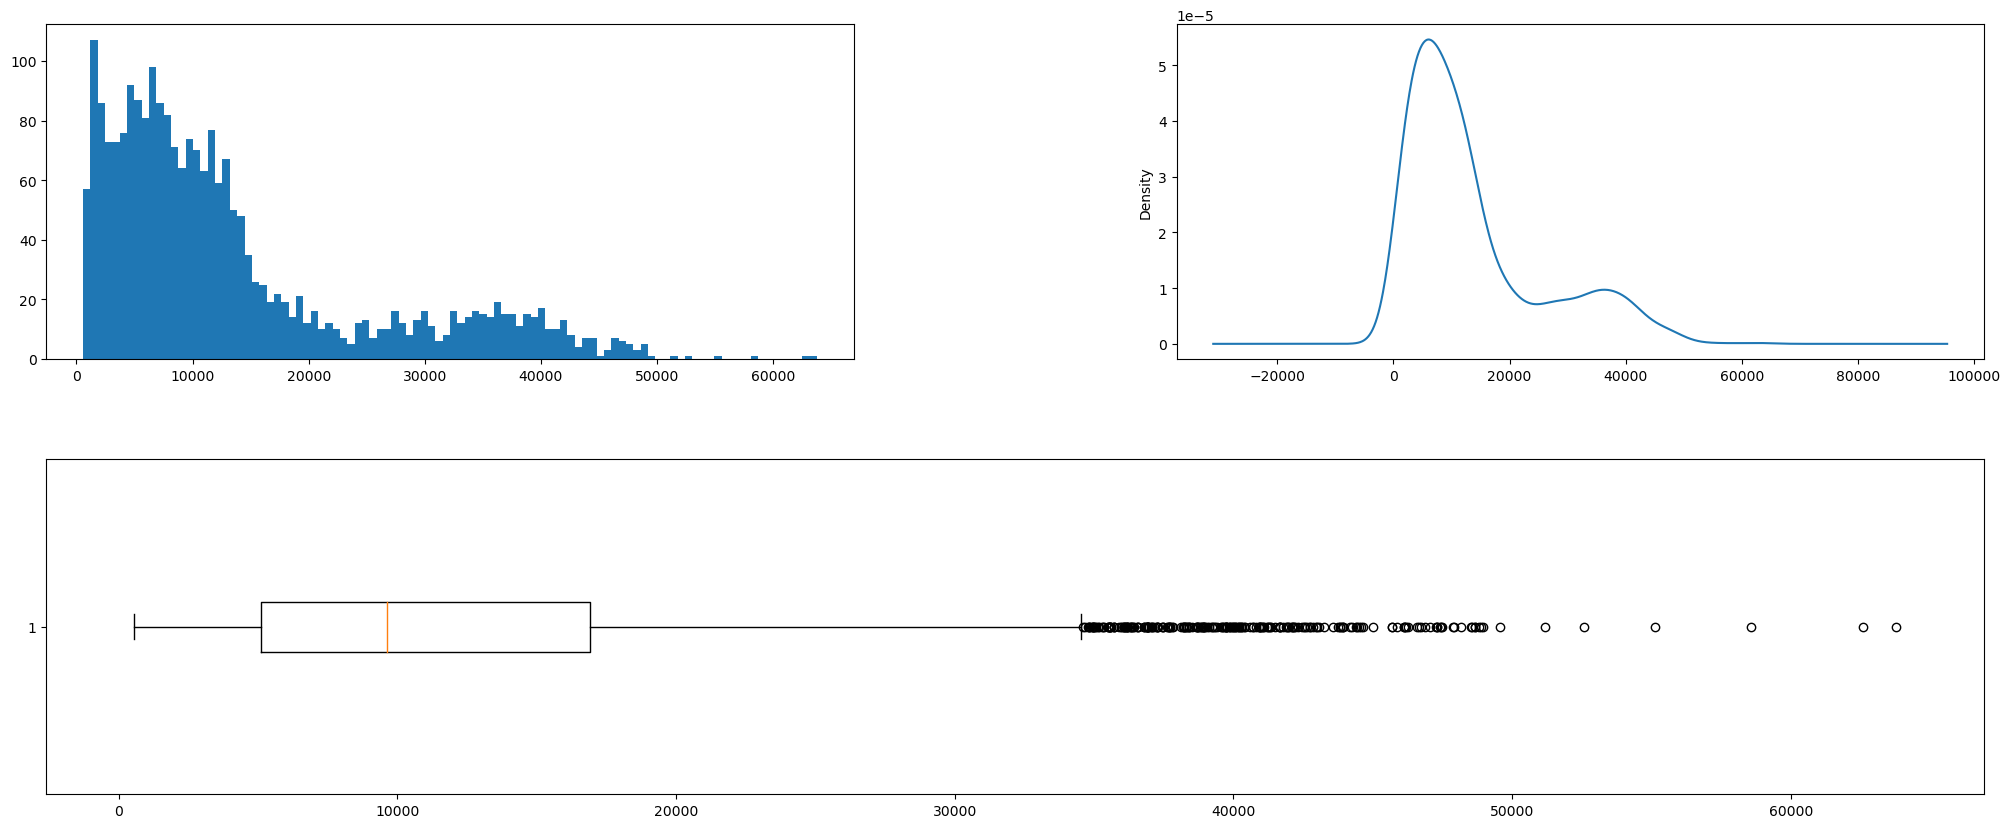

In [156]:
plt.figure(figsize =(25,10))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0,0])
plt.hist(whole_data_cleaned.charges, bins=100)
plt.subplot(grid[0,1])
whole_data_cleaned.charges.plot.kde()
plt.subplot(grid[1, :])
plt.boxplot(whole_data_cleaned.charges, vert = False)
plt.show()

#### WRT Gender

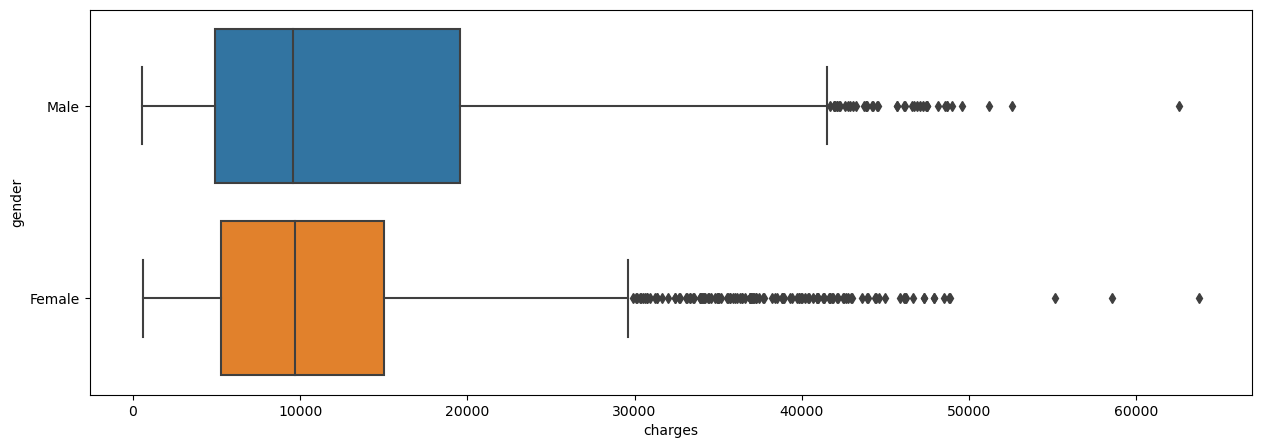

In [157]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'charges',y = 'gender', data = whole_data_cleaned)
plt.show()


#### WRT City tier

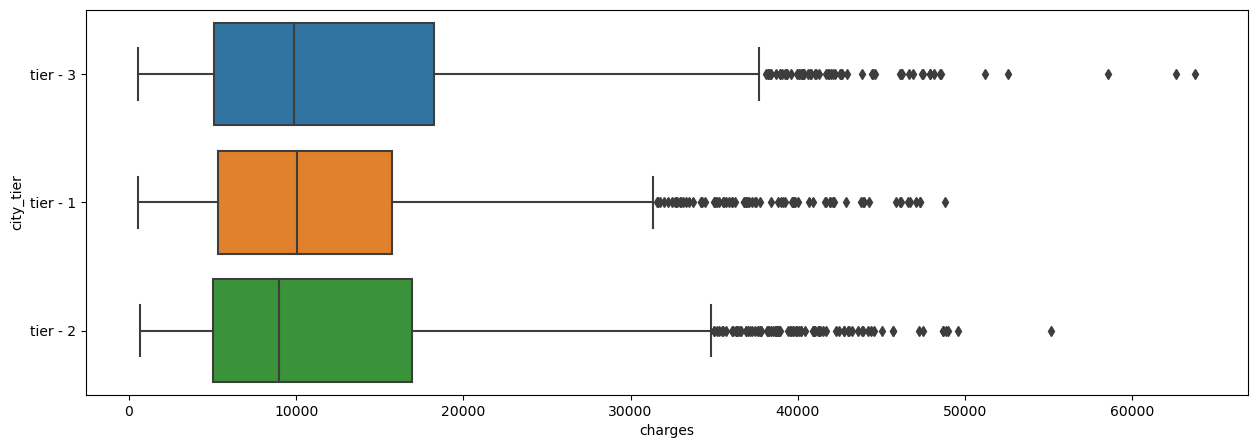

In [158]:
plt.figure(figsize= (15,5))
sns.boxplot(x = 'charges' , y = 'city_tier', data=whole_data_cleaned)
plt.show()


#### WRT Hospital tier


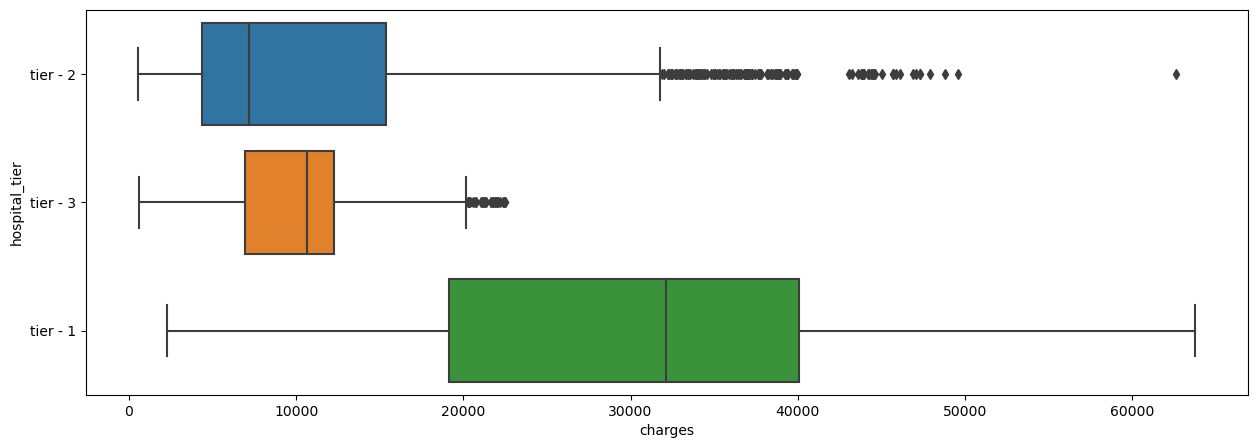

In [159]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'charges', y = 'hospital_tier' , data = whole_data_cleaned)
plt.show()

#### Swarm plot of gender , city_tier & hospital_tier

Gender

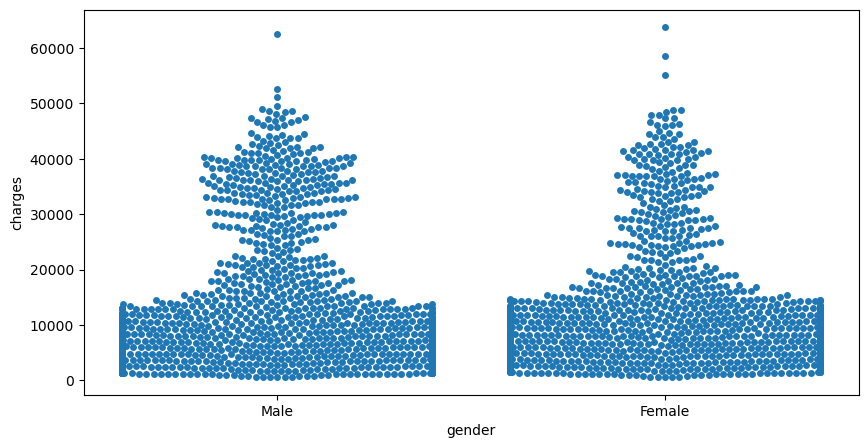

In [160]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = 'gender', y = 'charges', data= whole_data_cleaned)
plt.show()

city_tier

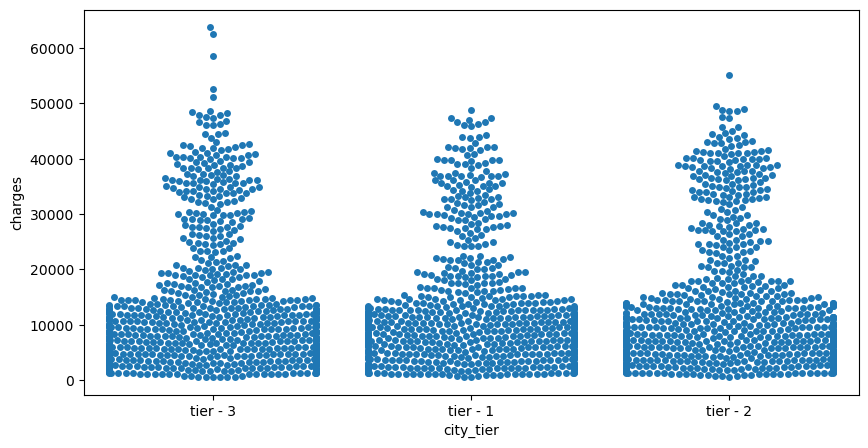

In [161]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = 'city_tier', y = 'charges', data = whole_data_cleaned)
plt.show()

hospital_tier

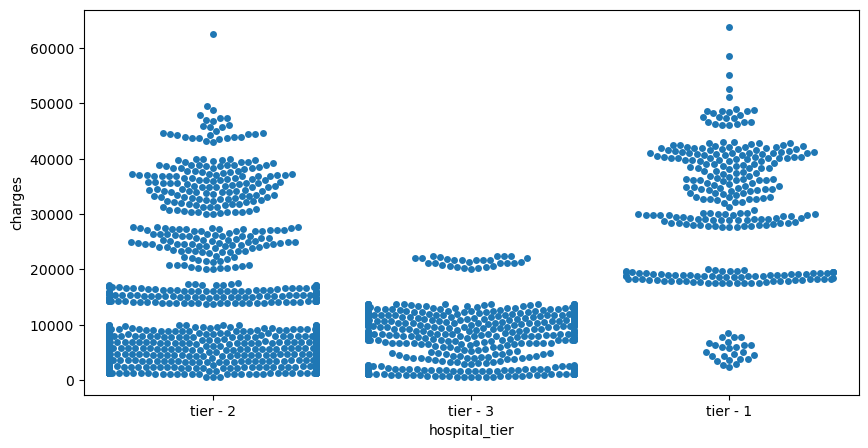

In [162]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = 'hospital_tier', y = 'charges', data=whole_data_cleaned)
plt.show()

#### Problem - 11
Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [163]:
import plotly.express as px

In [164]:
median = whole_data_cleaned.groupby('hospital_tier')[['charges']].median().reset_index()
median.T

,0,1,2
hospital_tier,tier - 1,tier - 2,tier - 3
charges,32097.435,7168.76,10676.83


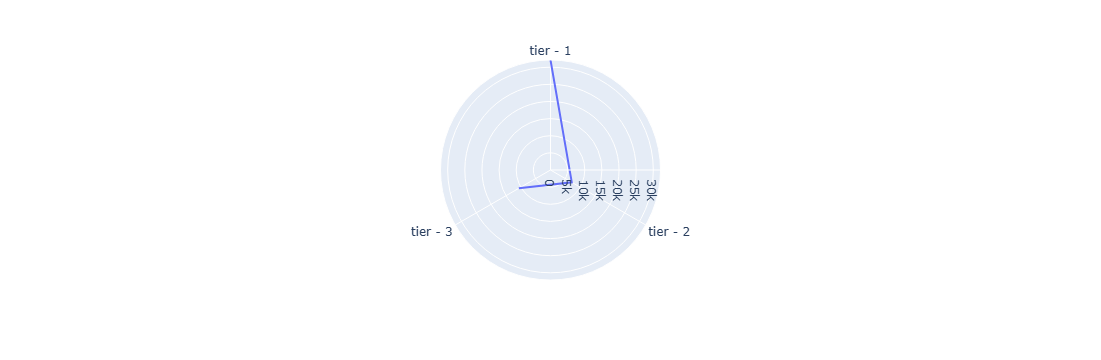

In [165]:
fig = px.line_polar(median, r= 'charges', theta='hospital_tier')
fig.show()

#### Problem - 12
Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

In [166]:
pd.crosstab(whole_data_cleaned.city_tier, whole_data_cleaned.hospital_tier)


hospital_tier,tier - 1,tier - 2,tier - 3
city_tier,,,
tier - 1,85,403,241
tier - 2,106,479,222
tier - 3,109,452,228


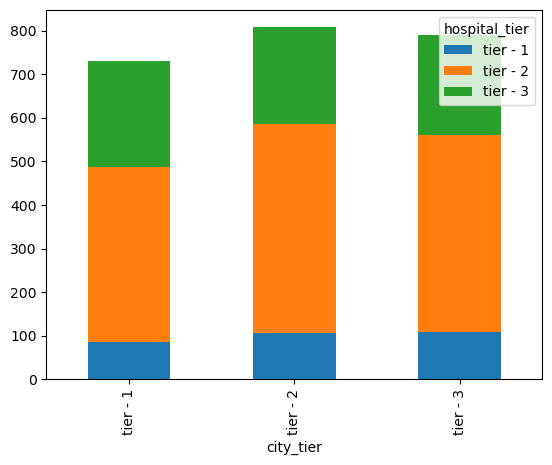

In [167]:
pd.crosstab(whole_data_cleaned.city_tier, whole_data_cleaned.hospital_tier).plot.bar(stacked = True)
plt.show()


#### Problem-13
Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

Test the following null hypotheses:
- Average hospitalization cost across the three types of hospitals is not significantly different
- Average hospitalization cost across the three types of cities is not significantly different
- Average hospitalization cost for smokers is not significantly different than non-smokers
- Smoking and Hearth issues are independent

H0 : Average hospitalization cost across the 3 types of hospitals is not significantly different


In [168]:
# ANNOVA TEST
from statsmodels import api as sm
from statsmodels.formula.api import ols

In [169]:
mod = ols('charges ~ hospital_tier' , data = whole_data_cleaned).fit()


In [170]:
result = sm.stats.anova_lm(mod)
result

,df,sum_sq,mean_sq,F,PR(>F)
hospital_tier,2.0,9.763011e+10,4.881505e+10,493.989566,1.773822e-179
Residual,2322.0,2.294554e+11,9.881799e+07,NaN,NaN


The p-value (PR(>F)) for hospital_tier is 1.773822e-179, indicating a highly significant difference in average hospitalization costs across the three types of hospitals.

H0: Average hospitalization cost for smokers is not significantly different than non-smokers

In [171]:
import scipy.stats as stats

In [172]:
sample_1 = whole_data_cleaned.loc[whole_data_cleaned.smoker == 'yes', 'charges']
sample_2 = whole_data_cleaned.loc[whole_data_cleaned.smoker != 'yes', 'charges']
stats.ttest_ind(sample_1,sample_2)


Ttest_indResult(statistic=74.15560699695726, pvalue=0.0)

The t-test yielded a t-statistic of 74.16 and a p-value of 0.0, leading to the rejection of the null hypothesis.
    
H0 : Smoking and Heart issues are independent

In [173]:
obs_table = pd.crosstab(whole_data_cleaned.smoker , whole_data_cleaned.heart_issues)
obs_table


heart_issues,No,yes
smoker,,
No,1108,731
yes,297,189


In [174]:
chi, p, df, expected = stats.chi2_contingency(obs_table)


In [175]:
print('Chi:', chi)
print('P:' ,p)
print('DF:' ,df)
print('Expected:' ,expected)

Chi: 0.08588150449910657
P: 0.7694797581780767
DF: 1
Expected: [[1111.30967742  727.69032258]
 [ 293.69032258  192.30967742]]


Since the p-value (0.7694797581780767) is much greater than any common significance level (e.g., 0.05), 
you fail to reject the null hypothesis. This means there is not enough evidence to suggest that smoking and heart issues are not independent.


# MACHINE LEARNING
#### Problem No. 1
Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this

In [176]:
whole_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2325 non-null   object 
 1   year                    2325 non-null   int32  
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   hospital_tier           2325 non-null   object 
 7   city_tier               2325 non-null   object 
 8   state_id                2325 non-null   object 
 9   bmi                     2325 non-null   float64
 10  hba1c                   2325 non-null   float64
 11  heart_issues            2325 non-null   object 
 12  any_transplants         2325 non-null   object 
 13  cancer_history          2325 non-null   object 
 14  numberofmajorsurgeries  2325 non-null   

 ## Remove the redundant variables such as year, month, date, city_tier, and hospital_tier, as new variables have already been created.

In [177]:
data = whole_data_cleaned.drop(columns= ['customer_id', 'name', 'year', 'month', 'date', 'hospital_tier','city_tier','state_id'])

In [178]:
whole_data_cleaned.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,...,numberofmajorsurgeries,smoker,name,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,title,gender
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,1,No,"German, Mr. Aaron K",0.0,1.0,1,0,0,Mr,Male
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,1,No,"Rosendahl, Mr. Evan P",2.0,1.0,1,0,0,Mr,Male
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,1,No,"Albano, Ms. Julie",2.0,1.0,1,0,0,Ms,Female
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",0.0,0.0,1,0,0,Mr,Male
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,1,No,"Brietzke, Mr. Jordan",0.0,0.0,1,0,0,Mr,Male


In [179]:
corr_plot = data.select_dtypes(exclude = 'object').corr()
ma = np.ones_like(corr_plot)
ma[np.tril_indices_from(ma)]=0

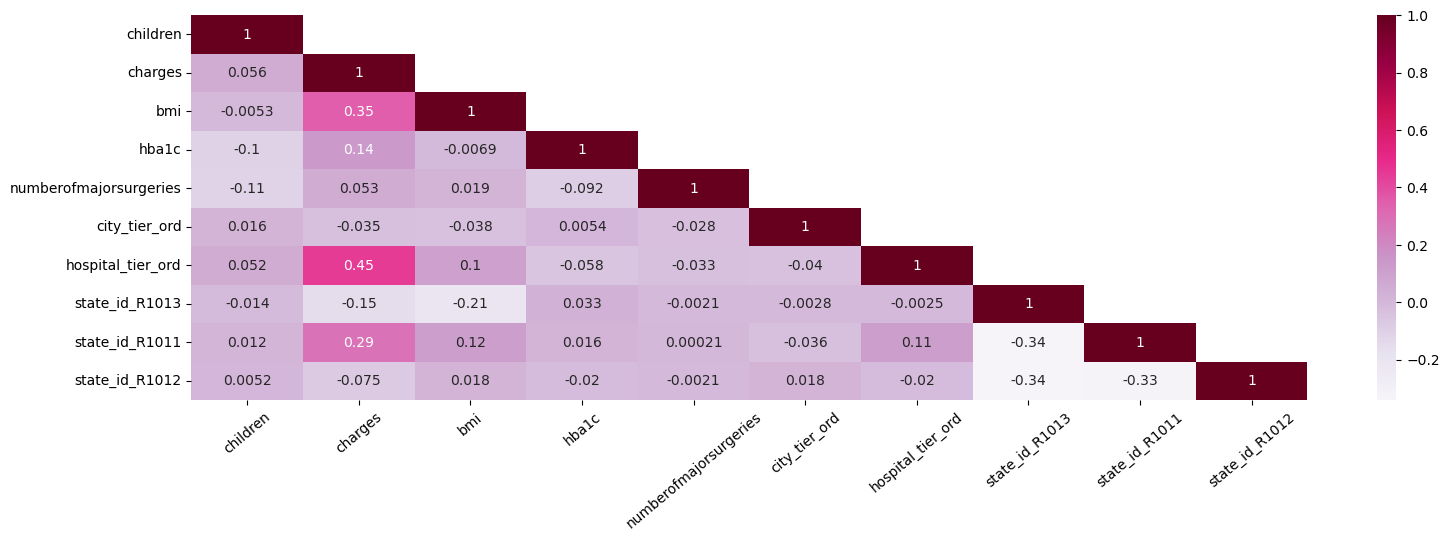

In [180]:
plt.figure(figsize=(18,5))
sns.heatmap(corr_plot, annot=True, mask=ma, cmap='PuRd')
plt.xticks(rotation=40)
plt.show()

#### Problem 2
Develop a regression model Linear or Ridge. Evaluate the model with k-fold cross validation.Also, ensure that you apply all the following suggestions:
- Implement the stratified 5-fold cross validationtechnique for both model building and validation
- Utilize effective standardization techniques and hyperparameter tuning
- Incorporate sklearn-pipelines to streamline the workflow
- Apply appropriate regularization techniques to address the bias-variance trade-off
- Create five folds in the data, and introduce a variable to identify the folds
- Develop Gradient Boost model and determine the variable importance scores,and identify the redundant variables

In [181]:
# lets first seperate input and output data
final_data = pd.get_dummies(data, drop_first = True,dtype = 'int')

In [182]:
final_data.head()

,children,charges,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,title_Mrs,title_Ms,gender_Male
0,0,563.84,17.58,4.51,1,0.0,1.0,1,0,0,0,0,0,0,0,0,1
1,0,570.62,17.60,4.39,1,2.0,1.0,1,0,0,0,0,0,0,0,0,1
2,0,600.00,16.47,6.35,1,2.0,1.0,1,0,0,0,0,1,0,0,1,0
3,0,604.54,17.70,6.28,1,0.0,0.0,1,0,0,0,0,0,0,0,0,1
4,0,637.26,22.34,5.57,1,0.0,0.0,1,0,0,0,0,0,0,0,0,1


In [183]:
x = final_data.drop(['charges'],axis=1)
y = final_data[['charges']]

In [184]:
x.head()

,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,title_Mrs,title_Ms,gender_Male
0,0,17.58,4.51,1,0.0,1.0,1,0,0,0,0,0,0,0,0,1
1,0,17.60,4.39,1,2.0,1.0,1,0,0,0,0,0,0,0,0,1
2,0,16.47,6.35,1,2.0,1.0,1,0,0,0,0,1,0,0,1,0
3,0,17.70,6.28,1,0.0,0.0,1,0,0,0,0,0,0,0,0,1
4,0,22.34,5.57,1,0.0,0.0,1,0,0,0,0,0,0,0,0,1


In [185]:
y.head()

,charges
0,563.84
1,570.62
2,600.00
3,604.54
4,637.26


In [186]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

In [187]:
x = np.array(x) if not isinstance(x, (np.ndarray, pd.DataFrame)) else x
y = np.array(y) if not isinstance(y, (np.ndarray, pd.Series)) else y

# Creating the pipeline with imputer, scaler, and regressor
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()), 
    ('regressor', Ridge())
])

In [188]:
# Defining the parameters for hyperparameter tuning
parameters = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Creating KFold objects
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

In [189]:

# Creating the GridSearchCV object
model_ridge = GridSearchCV(pipeline, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model
model_ridge.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [190]:
# Best parameters and score
print("Best parameters found: ", model_ridge.best_params_)
print("Best cross-validation score: ", -model_ridge.best_score_)

Best parameters found:  {'regressor__alpha': 10}
Best cross-validation score:  27598187.635163356


### Gradient Boosting Algorithms


In [191]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [192]:
# Assuming x and y are your features and target variable respectively
# Ensure x and y are numpy arrays or pandas DataFrame/Series
x = np.array(x) if not isinstance(x, (np.ndarray, pd.DataFrame)) else x
y = np.array(y) if not isinstance(y, (np.ndarray, pd.Series)) else y


In [193]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [194]:
#Creating and fitting the model
model = GradientBoostingRegressor()
model.fit(x_train, y_train)


GradientBoostingRegressor()

In [195]:

# Evaluating the model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 22781823.21077736


In [196]:
model.feature_importances_

array([5.63770547e-03, 1.26338965e-01, 3.10146179e-02, 1.12347874e-02,
       1.74742075e-04, 1.83416114e-02, 4.22033542e-03, 1.03307332e-02,
       6.56131700e-05, 2.39650665e-03, 8.67830956e-03, 1.66554810e-03,
       7.76959658e-01, 2.19685662e-04, 1.43603056e-03, 1.28515097e-03])

### Variable Importance

In [197]:
# Extracting feature importances
if isinstance(x, pd.DataFrame):
    feature_names = x.columns
else:
    # If x is a numpy array, you need predefined feature names or indices
    feature_names = [f'feature_{i}' for i in range(x.shape[1])]

feature_importances = pd.DataFrame({
    'features': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

      features  importance
12  feature_12    0.776960
1    feature_1    0.126339
2    feature_2    0.031015
5    feature_5    0.018342
3    feature_3    0.011235
7    feature_7    0.010331
10  feature_10    0.008678
0    feature_0    0.005638
6    feature_6    0.004220
9    feature_9    0.002397
11  feature_11    0.001666
14  feature_14    0.001436
15  feature_15    0.001285
13  feature_13    0.000220
4    feature_4    0.000175
8    feature_8    0.000066


In [198]:
# train score
model.score(x_train,y_train)

0.9080887003644722

In [199]:
# test score 
model.score(x_test,y_test)

0.8402868451691091

### Problem No. 3
Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (Date of birth 12/28/1988; height 170 cm; and weight 85 kgs). She lives with her partner and two children in a tier-1 city, and her state’s State ID is R1011. She was found to be nondiabetic (HbA1c = 5.8).
She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.


In [200]:
pred_data = pd.DataFrame({
 'name':['Christopher, Ms. Jayna'],
 'dob':['12/28/1988'],
 'children':[2],
 'bmi':[85/(1.7**2)],
 'hba1c':[5.8],
 'numberofmajorsurgeries':[0],
 'city_tier_ord':[1],
 'hospital_tier_ord':[1],
 'state_id_R1013':[0],
 'state_id_R1011':[1],
 'state_id_R1012':[0],
 'age':[36],
 'heart_issues_yes':[0],
 'any_transplants_yes':[0],
 'cancer_history_Yes':[1],
 'smoker_yes':[1],
 'gender_male':[0]
 
})

In [201]:
pred_data

,name,dob,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,age,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,gender_male
0,"Christopher, Ms. Jayna",12/28/1988,2,29.411765,5.8,0,1,1,0,1,0,36,0,0,1,1,0


In [202]:
whole_data.columns

Index(['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hba1c',
       'heart_issues', 'any_transplants', 'cancer_history',
       'numberofmajorsurgeries', 'smoker', 'name'],
      dtype='object')

In [203]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1 non-null      object 
 1   dob                     1 non-null      object 
 2   children                1 non-null      int64  
 3   bmi                     1 non-null      float64
 4   hba1c                   1 non-null      float64
 5   numberofmajorsurgeries  1 non-null      int64  
 6   city_tier_ord           1 non-null      int64  
 7   hospital_tier_ord       1 non-null      int64  
 8   state_id_R1013          1 non-null      int64  
 9   state_id_R1011          1 non-null      int64  
 10  state_id_R1012          1 non-null      int64  
 11  age                     1 non-null      int64  
 12  heart_issues_yes        1 non-null      int64  
 13  any_transplants_yes     1 non-null      int64  
 14  cancer_history_Yes      1 non-null      int64 

In [204]:
pred_data['dob'] = pd.to_datetime(pred_data.dob,errors = 'coerce')

In [205]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    1 non-null      object        
 1   dob                     1 non-null      datetime64[ns]
 2   children                1 non-null      int64         
 3   bmi                     1 non-null      float64       
 4   hba1c                   1 non-null      float64       
 5   numberofmajorsurgeries  1 non-null      int64         
 6   city_tier_ord           1 non-null      int64         
 7   hospital_tier_ord       1 non-null      int64         
 8   state_id_R1013          1 non-null      int64         
 9   state_id_R1011          1 non-null      int64         
 10  state_id_R1012          1 non-null      int64         
 11  age                     1 non-null      int64         
 12  heart_issues_yes        1 non-null      int64         

In [206]:
age = 2024 - pred_data.dob.dt.year
age

0    36
Name: dob, dtype: int64

In [207]:
test_data = pred_data.drop(['dob','name'],axis=1)

In [208]:
test_data

,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_R1013,state_id_R1011,state_id_R1012,age,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,gender_male
0,2,29.411765,5.8,0,1,1,0,1,0,36,0,0,1,1,0


### Predicting the charges of test_data using best model


In [209]:

# Check the number of features in test_data
num_features_test = test_data.shape[1]  # Assuming test_data is a DataFrame or numpy array

# Predict with the model
try:
    y_pred = model.predict(test_data)
    print("Predictions:", y_pred)
except ValueError as e:
    print(f"Error predicting: {e}")

# Print information for diagnostic purposes
print(f"Number of features in test_data: {num_features_test}")


Error predicting: X has 15 features, but GradientBoostingRegressor is expecting 16 features as input.
Number of features in test_data: 15


### Thanks and Regards,
### Moirangmayum Ronaldo